In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import cross_validation

sns.set()

# Make charts a bit bolder
#sns.set_context("talk")

%matplotlib inline

# Default figure size
sns.set(rc={"figure.figsize": (12, 6)})

# This actually makes autocomplete WAY faster ...
%config Completer.use_jedi = False

# Show only 2 decimals for floating point numbers
pd.options.display.float_format = "{:.2f}".format

sns.set_style('whitegrid')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data = pd.read_csv('./crypto-markets.csv')

In [6]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.54,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.78,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.38,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.29,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.39,33.32


In [7]:
data.shape

(679183, 13)

Here are the descriptions for some of the columns that I wasn't really sure about:

+ volume - Transactions volume
+ market - Market Cap
+ ranknow - Currency rank
+ spread - Spread between high and low

# Data wrangle & cleanup

In [8]:
# Convert date to real date
data['date'] = pd.to_datetime(data['date'])

# Convert market and volume to "billion" as they are rather HUUUGE
data['market_billion'] = data['market'] / 1000000000
data['volume_million'] = data['volume'] / 1000000

In [9]:
# Let's prepare one dataframe where we will observe closing prices for each currency
wide_format = data.groupby(['date', 'name'])['close'].last().unstack()
wide_format.head(3)

name,0x,10M Token,2GIVE,300 Token,42-coin,808Coin,8Bit,AI Doctor,AICHAIN,ALIS,...,iExec RLC,iQuant,iTicoin,iXledger,indaHash,netBit,onG.social,ugChain,vSlice,vTorrent
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-04-29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-04-30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Data exploration

## Top 10 currencies in 2018th

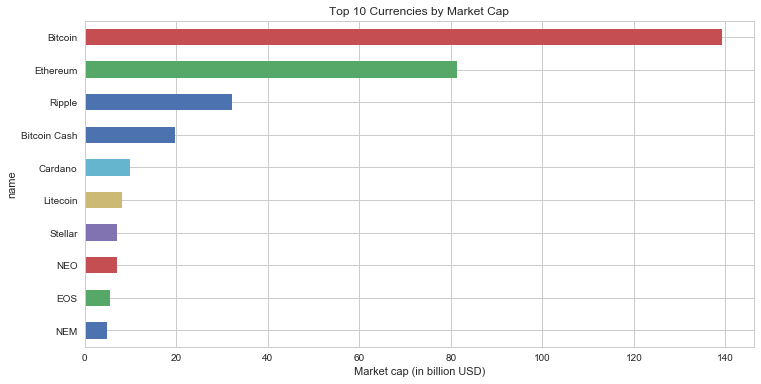

In [10]:
ax = data.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

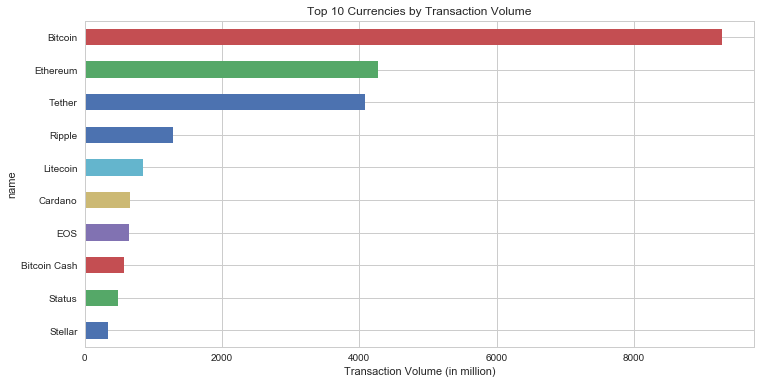

In [11]:
ax = data.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [12]:
# For sake of convenience, let's define the top 5 currencies

top_5_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index

data_top_5_currencies = data[data['name'].isin(top_5_currency_names)]

data_top_5_currencies.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.54,3.88,1.50,0.00
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.78,13.49,1.49,0.00
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.38,12.88,1.60,0.00
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.29,32.17,1.54,0.00
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.39,33.32,1.29,0.00


# Trend charts

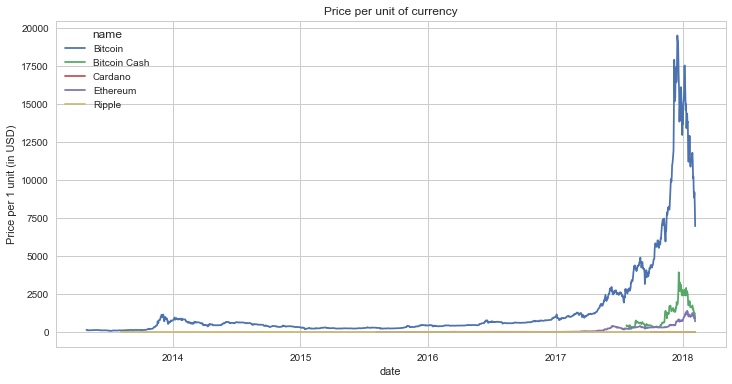

In [13]:
ax = data_top_5_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

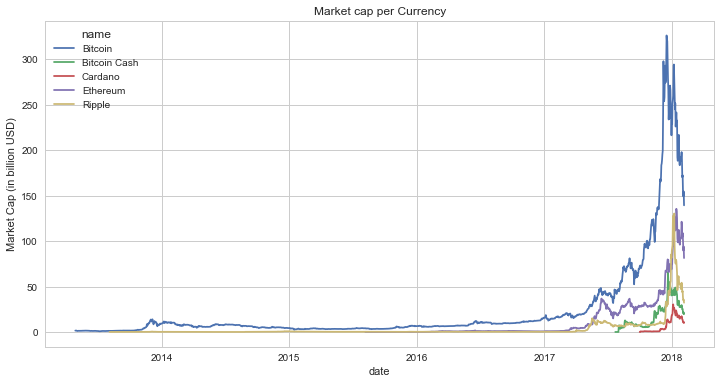

In [14]:
ax = data_top_5_currencies.groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency");

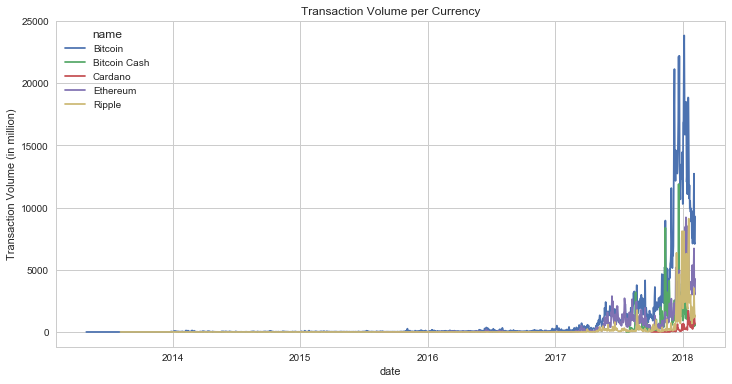

In [15]:
ax = data_top_5_currencies.groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

# Trend charts in 2017th

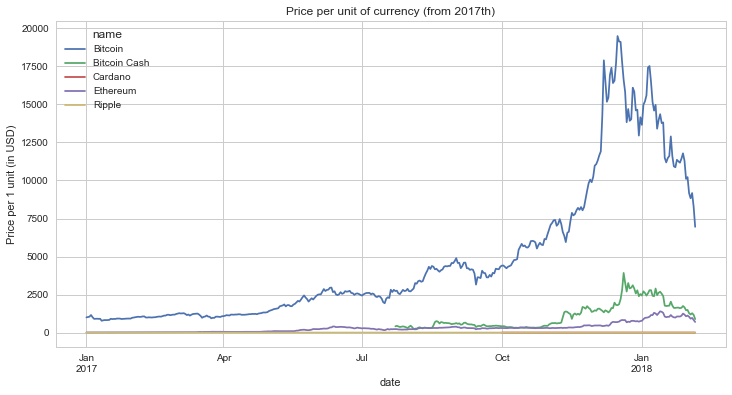

In [16]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency (from 2017th)");

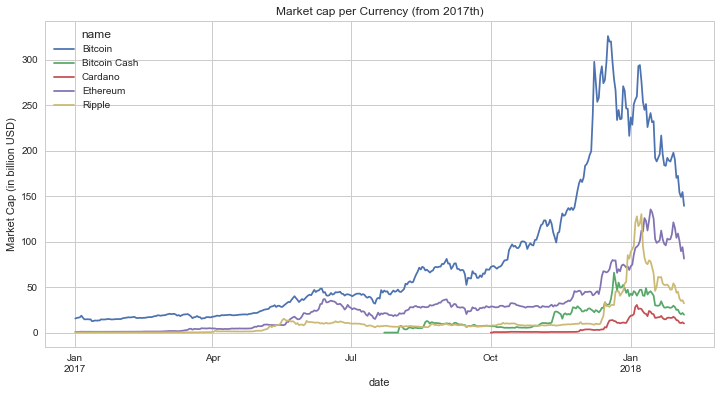

In [17]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency (from 2017th)");

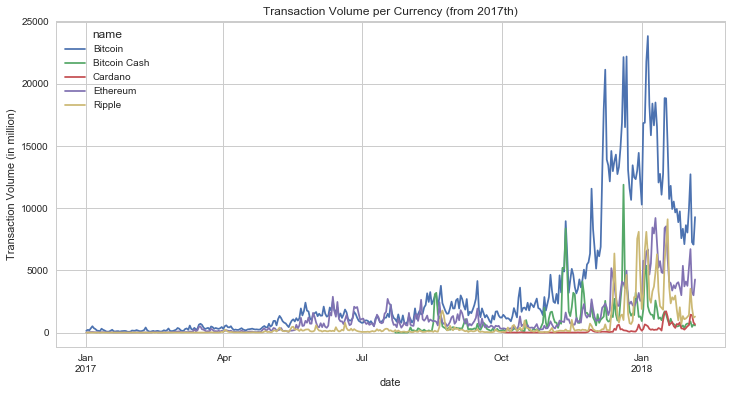

In [18]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency (from 2017th)");

## Correlation

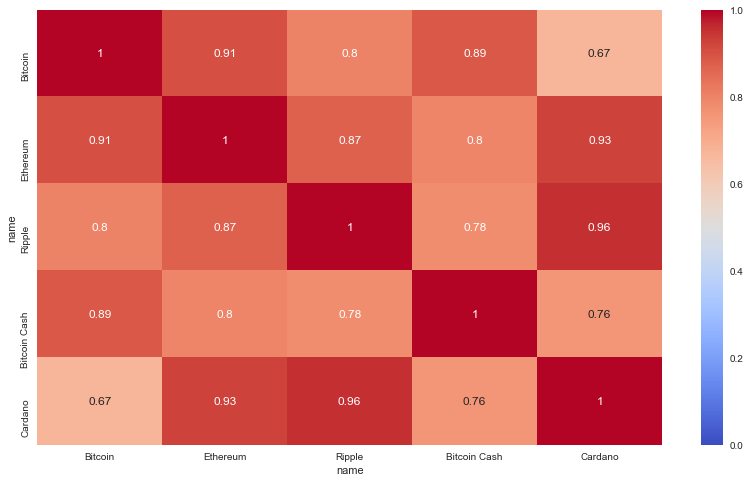

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(wide_format[top_5_currency_names].corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

# Experiments

Small experiment - let's assume that we invested some amount (say - 1000 USD) at some point. Let's see what ROI would we have.

In [20]:
def plot_roi(amount, df):
    ((amount / df.iloc[0]) * df).plot(figsize=(12,8))

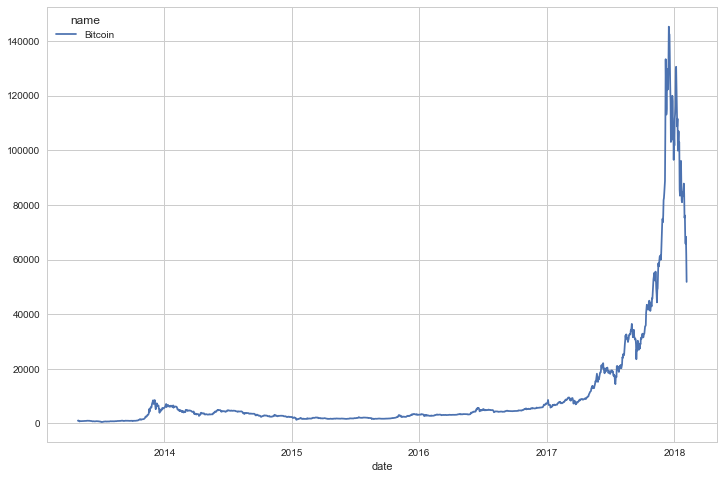

In [21]:
plot_roi(1000, wide_format[['Bitcoin']])

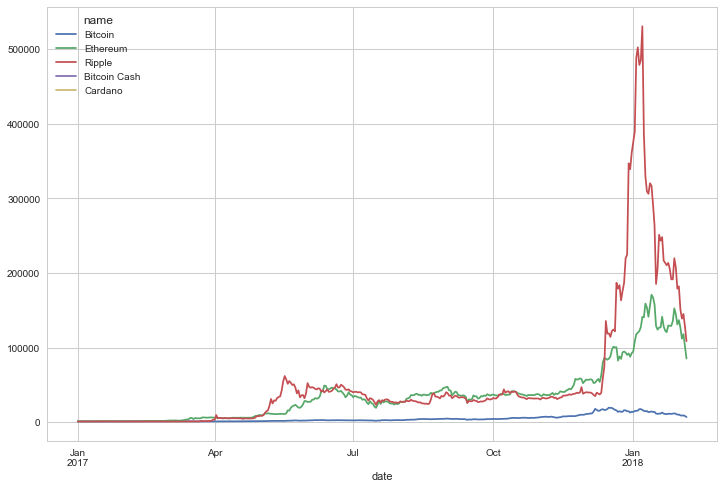

In [22]:
wide_format_2017th = wide_format[(wide_format.index.year >= 2017)]
plot_roi(1000, wide_format_2017th[top_5_currency_names])

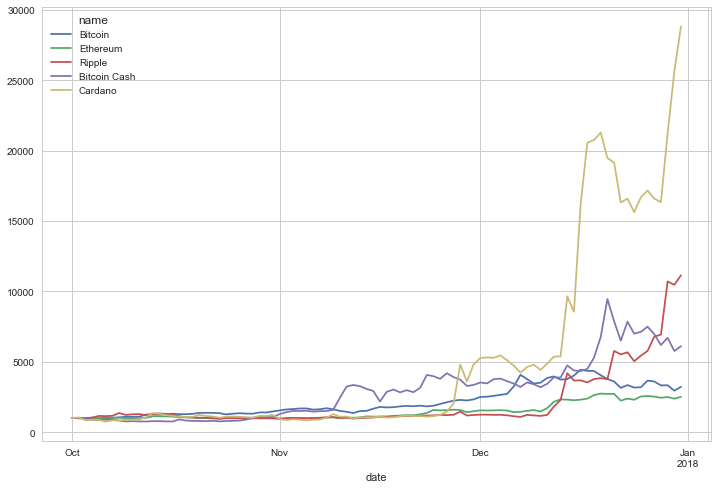

In [23]:
wide_format_late_2017th = wide_format[(wide_format.index.year >= 2017) & (wide_format.index.month >= 10)]
plot_roi(1000, wide_format_late_2017th[top_5_currency_names])

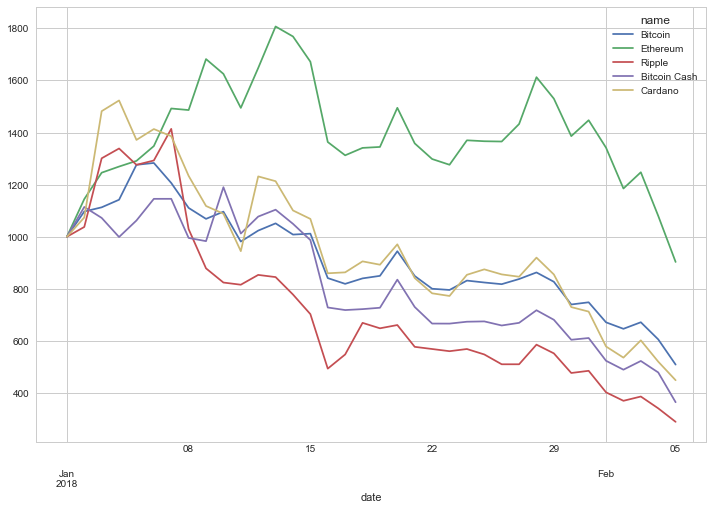

In [24]:
wide_format_2018th = wide_format[(wide_format.index.year >= 2018)]
plot_roi(1000, wide_format_2018th[top_5_currency_names])

In [25]:
len(data.slug.unique())

1513

# Predictions

In [26]:
# Let's try something -- let's take values from previos 3 days and predict whether the price is going to go up or down

In [122]:
test = data[data['name'] == 'Bitcoin'].copy()

In [136]:
test['price_diff_d1'] = 0 # 1-day ago
test['price_diff_d2'] = 0 # 2-days ago
test['price_diff_d3'] = 0 # 3-days ago

test['trend'] = 0 # 0 = no change, -1 = price dropped, 1 = price increased

In [137]:
for i, row in test.iterrows():
    for j in range(1, 4):
        if ((i-j) < 0):
            # Skip rows at the beginning
            continue
   
        current_price  = row['close']
        prev_price = test.iloc[(i-j)]['close']
        
        column = 'price_diff_d'+str(j)
        
        test.ix[i, column] = (current_price - prev_price)
        
    if (i > 0):
        test.ix[i, 'trend'] = 1 if current_price > test.loc[(i-1)]['close'] else -1

In [139]:
X = test[['close', 'price_diff_d1', 'price_diff_d2', 'price_diff_d3']]

In [140]:
y = test['trend']

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [143]:
X_train.shape

(1221, 4)

In [144]:
X_test.shape

(524, 4)

In [145]:
y_train.shape

(1221,)

In [146]:
model = RandomForestClassifier(n_estimators=10, max_depth=None, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [147]:
scores = cross_val_score(model, X, y)
scores.mean() 

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.99885648942252725

In [148]:
data.tail(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million
679178,bitcoin-atom,BCA,Bitcoin Atom,2018-02-01,1515,45.95,55.17,41.70,42.95,38029,0,0.09,13.47,0.00,0.04
679179,bitcoin-atom,BCA,Bitcoin Atom,2018-02-02,1515,42.90,42.90,29.18,35.91,48024,0,0.49,13.72,0.00,0.05
679180,bitcoin-atom,BCA,Bitcoin Atom,2018-02-03,1515,35.99,36.71,30.10,30.74,27136,0,0.10,6.61,0.00,0.03
679181,bitcoin-atom,BCA,Bitcoin Atom,2018-02-04,1515,30.75,34.90,23.93,23.93,26370,0,0.00,10.97,0.00,0.03
679182,bitcoin-atom,BCA,Bitcoin Atom,2018-02-05,1515,25.52,27.42,19.25,19.68,17804,0,0.05,8.17,0.00,0.02


In [149]:
y_pred = model.predict(X_test)

In [154]:
y_pred[-5:]

array([-1,  1,  1, -1, -1])

In [155]:
test['predicted'] = model.predict(X)

In [156]:
test[['predicted', 'trend']]

,predicted,trend
0,-1,0
1,1,1
2,-1,-1
3,-1,-1
4,-1,-1
5,-1,-1
6,1,1
7,1,1
8,-1,-1
9,-1,-1


In [159]:
[y_pred == y_test]

False